(1) Import libraries

In [1]:
import os
import fnmatch
import cv2
import numpy as np
import sys
np.random.seed(1337)  # for reproducibility
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.models import Sequential, Model, load_model
from keras import backend as BK
import cv2
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import scipy.io as sio
from collections import OrderedDict
import random 
random.seed(100)
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.
C:\Users\sally\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sally\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sally\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sally\AppData\Roa

Populating the interactive namespace from numpy and matplotlib


C:\Users\sally\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(2) Define variables and parameters

In [2]:
speaker = 's9'

base_path='D:/Mrs_backup/speech_test/gabor_picture/'+ speaker + '/'

autoencoder_path= 'D:/Mrs_backup/speech_test/autoencoder/'+ speaker + '_trainModel/'

integrate_data_path ='D:/Mrs_backup/speech_test/model_input/gp/'+ speaker + '/'
if not os.path.exists(integrate_data_path):
    os.mkdir(integrate_data_path)

In [3]:
img_width =80
img_height =40
slice_length =5
num_img =358
num_slices=15
slice_length = int(num_img/num_slices)
# num_videos =10
num_videos =100
print(slice_length)

23


(3) Define functions for video input

In [4]:
# Define diff function to add 3 time-derivative channels
def diff(buf_input):
    buf_input=np.pad(buf_input,((0,0),(0,0),(1,0)),'edge')
    buf_output=np.diff(buf_input,axis=2)
    #print(buf_output.shape)
    return buf_output

In [5]:
# Define slice_video_3D function to divide into 15 non-overlap slices each of length 5
def slice_video_3D(video):
    video_output =np.empty((num_slices,3,img_height,img_width,slice_length), np.dtype('float32'))
    
    start=0
    for i in range(0,num_slices):
        video_output[i,:,:,:,:]=video[:,:,:,start:start+slice_length]
        start+=slice_length
    return video_output

# Define diff function to add 3 time-derivative channels
def diff(buf_input):
    buf_input=np.pad(buf_input,((0,0),(0,0),(1,0)),'edge')
    buf_output=np.diff(buf_input,axis=2)
    #print(buf_output.shape)
    return buf_output

In [6]:
# Define the shape of the video_input [10*15,40,80,5]
video_input =np.empty((num_videos*(num_slices),3,int(img_height),int(img_width),int(slice_length)), np.dtype('float32'))
print(video_input.shape)

(1500, 3, 40, 80, 23)


In [7]:
j=0
for filename in os.listdir(base_path): 
    src =base_path+ filename 
    print(src)
    format_num1="{number:03}".format(number=j)
    dst =base_path + str(format_num1)
    print(dst)
    os.rename(src, dst)
    j=j+1   

D:/Mrs_backup/speech_test/gabor_picture/s9/bbae4n
D:/Mrs_backup/speech_test/gabor_picture/s9/000
D:/Mrs_backup/speech_test/gabor_picture/s9/bbae5s
D:/Mrs_backup/speech_test/gabor_picture/s9/001
D:/Mrs_backup/speech_test/gabor_picture/s9/bbae6p
D:/Mrs_backup/speech_test/gabor_picture/s9/002
D:/Mrs_backup/speech_test/gabor_picture/s9/bbae7a
D:/Mrs_backup/speech_test/gabor_picture/s9/003
D:/Mrs_backup/speech_test/gabor_picture/s9/bbak8n
D:/Mrs_backup/speech_test/gabor_picture/s9/004
D:/Mrs_backup/speech_test/gabor_picture/s9/bbak9s
D:/Mrs_backup/speech_test/gabor_picture/s9/005
D:/Mrs_backup/speech_test/gabor_picture/s9/bbal1a
D:/Mrs_backup/speech_test/gabor_picture/s9/006
D:/Mrs_backup/speech_test/gabor_picture/s9/bbalzp
D:/Mrs_backup/speech_test/gabor_picture/s9/007
D:/Mrs_backup/speech_test/gabor_picture/s9/bbar2n
D:/Mrs_backup/speech_test/gabor_picture/s9/008
D:/Mrs_backup/speech_test/gabor_picture/s9/bbar3s
D:/Mrs_backup/speech_test/gabor_picture/s9/009
D:/Mrs_backup/speech_test/gabo

D:/Mrs_backup/speech_test/gabor_picture/s9/bgbn3a
D:/Mrs_backup/speech_test/gabor_picture/s9/088
D:/Mrs_backup/speech_test/gabor_picture/s9/bgbnzn
D:/Mrs_backup/speech_test/gabor_picture/s9/089
D:/Mrs_backup/speech_test/gabor_picture/s9/bgbt4n
D:/Mrs_backup/speech_test/gabor_picture/s9/090
D:/Mrs_backup/speech_test/gabor_picture/s9/bgbt5s
D:/Mrs_backup/speech_test/gabor_picture/s9/091
D:/Mrs_backup/speech_test/gabor_picture/s9/bgbt6p
D:/Mrs_backup/speech_test/gabor_picture/s9/092
D:/Mrs_backup/speech_test/gabor_picture/s9/bgbt7a
D:/Mrs_backup/speech_test/gabor_picture/s9/093
D:/Mrs_backup/speech_test/gabor_picture/s9/bgif8n
D:/Mrs_backup/speech_test/gabor_picture/s9/094
D:/Mrs_backup/speech_test/gabor_picture/s9/bgif9s
D:/Mrs_backup/speech_test/gabor_picture/s9/095
D:/Mrs_backup/speech_test/gabor_picture/s9/bgig1a
D:/Mrs_backup/speech_test/gabor_picture/s9/096
D:/Mrs_backup/speech_test/gabor_picture/s9/bgigzp
D:/Mrs_backup/speech_test/gabor_picture/s9/097
D:/Mrs_backup/speech_test/gabo

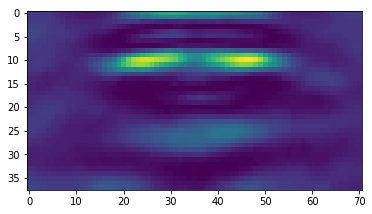

[[17 16 16 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [18 18 18 ... 16 16 16]
 ...
 [18 18 17 ... 11 11 11]
 [20 20 19 ... 11 10 10]
 [21 21 20 ... 10 10 10]]


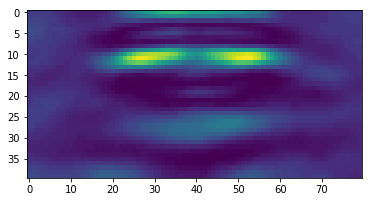

In [8]:
#D:\speech_dataset\GRID\GP_100_75frames\s1_gp_test\gabor\bbal8p
img_path = 'D:/Mrs_backup/speech_test/gabor_picture/'+ speaker + '/002/27.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

image = cv2.resize(img,(80,40))
print(image)
plt.imshow(image)

In [9]:
start = 0
print(num_videos)
for n in range(0,num_videos):
    print(n, end=' ')
    format_num1="{number:03}".format(number=n)
    path = base_path+str(format_num1)
    dirs = os.listdir(path)
    num_img = len(dirs) 
    #print(num_img)
    
    tmp0 = np.empty((int(img_height),int(img_width),int(num_img)), np.dtype('float32'))
   
    for i in range(0,num_img):
        img_path =  path + '/'+str(dirs[i])
        #print(img_path)
        
        
        # Load an color image in grayscale
        img = cv2.imread(img_path,0)
        
        image = cv2.resize(img,(80,40))
        #print(image.shape)
        
        tmp0[:,:,i] = image
        #print(tmp0)
    
    # Call diff function to add 3 time-derivative channels
    diff_video=np.empty((3,tmp0.shape[0],tmp0.shape[1],tmp0.shape[2]))
    diff_video[0,:,:,:]=tmp0
    diff_video[1,:,:,:]=diff(tmp0)
    diff_video[2,:,:,:]=diff(diff_video[1,:,:,:])
    #print(diff_video.shape)
    
    # Call slice_video_3D function
    data_vid=slice_video_3D(diff_video)
    #data_vid=data_vid/255
    #print(data_vid)
    
    # Add total number of slices 
    video_input[start:start+num_slices,:,:,:,:]=data_vid
    #print(video_input.shape)
    start+=num_slices
    #print(start)
    
print('Video slices shape:'+str(video_input.shape))

100
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Video slices shape:(1500, 3, 40, 80, 23)


In [10]:
print(video_input.shape)
print(video_input[100,0,:,:,1])

(1500, 3, 40, 80, 23)
[[16. 15. 16. ... 11. 11. 11.]
 [16. 16. 16. ... 12. 11. 11.]
 [16. 16. 16. ... 12. 11. 11.]
 ...
 [11. 11. 11. ...  5.  5.  5.]
 [12. 12. 11. ...  3.  3.  3.]
 [12. 12. 12. ...  2.  2.  2.]]


(5) Define functions for audio data

In [11]:
# Define slice_audio_spec function to to divide into 15 non-overlap slices each of length 26
def slice_audio_spec(audio_spec):
    global AUDIO_LENGTH
    window_size=int(AUDIO_LENGTH/num_slices) #from time to number of audio index 
    #print(window_size)
    audio_output =np.empty((num_slices,audio_spec.shape[0],window_size), np.dtype('float32'))
    start=0
    for i in range(0,num_slices):
        audio_output[i,:,:]=audio_spec[:,start:start+window_size]
        start+=window_size
        if start>AUDIO_LENGTH-window_size:
            break
    #print(audio_output.shape)
    #print(audio_output[1,:,1])
    return audio_output

# Define get activations function # Extract the 32-bin bottleneck features as target for the main network
def get_activations(model, layer_in, layer_out, X_batch):
    get_activations = BK.function([model.layers[layer_in].input, BK.learning_phase()], [model.layers[layer_out].output])
    activations = get_activations([X_batch,0])
    return activations

#Define padding function
def get_padded_spec(data):
    
    # Compress the spectrogram by raising to the power 1/3
    #print(data[1:3,1])
    data=np.power(data,.3)
    #print(data[1,370])
    
    # Get the video length
    t=data.shape[1]
   
    # Get the number of pads
    num_pads=int((2*num_slices)-(t%(2*num_slices)))
    #print(num_pads)
    
    # Add padding to the video length
    padded_data=np.pad(data,((0,0),(0,num_pads)),'reflect')
    #print(padded_data[1,370])
    #print(padded_data[1,365:390])
    #print(padded_data.shape)

    return padded_data

(6) Load autoencoder model

In [12]:
# Define cost function [mean squared error + correlation loss]
def corr2_mse_loss(a,b):
    a = BK.tf.subtract(a, BK.tf.reduce_mean(a))
    b = BK.tf.subtract(b, BK.tf.reduce_mean(b))
    tmp1 = BK.tf.reduce_sum(BK.tf.multiply(a,a))
    tmp2 = BK.tf.reduce_sum(BK.tf.multiply(b,b))
    tmp3 = BK.tf.sqrt(BK.tf.multiply(tmp1,tmp2))
    tmp4 = BK.tf.reduce_sum(BK.tf.multiply(a,b))
    r = -BK.tf.divide(tmp4,tmp3)
    m=BK.tf.reduce_mean(BK.tf.square(BK.tf.subtract(a, b)))
    rm=BK.tf.add(r,m)
    return rm

# Load autoencoder model
print('Loading autoencoder model...')
config = BK.tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = BK.tf.Session(config=config)
model=load_model(autoencoder_path+'autoencoder.h5',custom_objects={'corr2_mse_loss': corr2_mse_loss})
model.load_weights(autoencoder_path+'autoencoder_weights.h5')

Loading autoencoder model...


(7)Audio feature extraction 

In [13]:
# Open the text file of auditory spectrogram input path 
audio_path = 'D:/Mrs_backup/speech_test/AudSpecs'
text_file = open(audio_path+'/'+ speaker + '_valid_aud_specs.txt','r')

# Load each line of the text file
lines = text_file.read().split('\n')
index_shuf=list(range(len(lines)))
lines_shuf=[]
for i in index_shuf:
    lines_shuf.append(lines[i])

# Get the number of audios
num_audios=len(lines)

# Get data shape 
mat=sio.loadmat(lines[0])
data = mat['y'].T[:,2:]

# get_padded_spec function to get the shape after padding data
padded_data=get_padded_spec(data=data)
global AUDIO_LENGTH
AUDIO_LENGTH=padded_data.shape[1]

# Call get_activations function to get the shape after bottleneck features
bottleneck=get_activations(model, 0, 12, padded_data.T)
bottleneck=bottleneck[0].T

# Get the total shape of audio_input variable
audio_input =np.empty((num_audios*(num_slices),bottleneck.shape[0],int(AUDIO_LENGTH/num_slices)), np.dtype('float32'))
print("Audio slices shape:" + str(audio_input.shape))

tmp =np.zeros((AUDIO_LENGTH), np.dtype('float32'))


i=0
for row in lines_shuf:
    
    # Load data from the path
    mat=sio.loadmat(row)
    
    # Read data from the second feature
    data = mat['y'].T[:,2:]
    
    # Call get_padded_spec function: 
    # (1). Compress the spectrogram by raising to the power 1/3 
    # (2). Add padding to the video length 
    padded_data=get_padded_spec(data=data)
   
    
    # Call get_activations function to get the bottleneck feature from autoencoder model 
    # Encoder auditory spectrogram
    bottleneck=get_activations(model, 0, 12, padded_data.T)
    
    #Transpose bottleneck[0] varaible
    bottleneck=bottleneck[0].T
       
    # Call slice_audio_spec function to divide into 15 non-overlap audio slices each of length [390/15] 26
    data=slice_audio_spec(bottleneck)
    #print(data.shape)
    
    #Get the total audio slices
    audio_input[i*(num_slices):(i+1)*(num_slices),:,:]=data[:,:,:]
    i+=1
    if i>=num_audios:
        break
    if i%10==0:
        print(str(i)+'/'+str(num_audios))

audio_output=np.reshape(audio_input,(audio_input.shape[0],audio_input.shape[1]*audio_input.shape[2]))
print('Audio slices shape:'+str(audio_input.shape))
print('Target features to network shape:'+str(audio_output.shape))

Audio slices shape:(1500, 32, 26)
10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100
Audio slices shape:(1500, 32, 26)
Target features to network shape:(1500, 832)


(8) Data_integration

In [14]:
N=80
num_test=20
num_train=num_audios-num_test
L=int(np.ceil(num_train/N)*num_slices)
print(L)
i=0
for i in range(N):
    if i<79:
        print('Saving data part'+str(i+1)+'...')
        print('Saving test data')
        start=i*L
        end=(i+1)*L
        print(str(start)+' to '+str(end))
        sio.savemat(integrate_data_path+'preprocessed_data_final_part'+str(i+1)+'.mat', mdict={'video_input': video_input[start:end,:,:,:,:], 'audio_input' : audio_input[start:end,:,:]})
    else:
        print('Saving data part'+str(i+1)+'...')
        start=i*L
        end=num_train*num_slices
        print(str(start)+' to '+str(end))
        sio.savemat(integrate_data_path+'preprocessed_data_final_part'+str(i+1)+'.mat', mdict={'video_input': video_input[start:end,:,:,:,:], 'audio_input' : audio_input[start:end,:,:]})

print('Saving validation data...')
start=num_train*num_slices
print(str(start)+' to '+str(video_input.shape[0]))
print(video_input[start:,:,:,:,:].shape)
sio.savemat(integrate_data_path+'preprocessed_data_final_validation.mat', mdict={'video_input': video_input[start:,:,:,:,:], 'audio_input' : audio_input[start:,:,:]})

15
Saving data part1...
Saving test data
0 to 15
Saving data part2...
Saving test data
15 to 30
Saving data part3...
Saving test data
30 to 45
Saving data part4...
Saving test data
45 to 60
Saving data part5...
Saving test data
60 to 75
Saving data part6...
Saving test data
75 to 90
Saving data part7...
Saving test data
90 to 105
Saving data part8...
Saving test data
105 to 120
Saving data part9...
Saving test data
120 to 135
Saving data part10...
Saving test data
135 to 150
Saving data part11...
Saving test data
150 to 165
Saving data part12...
Saving test data
165 to 180
Saving data part13...
Saving test data
180 to 195
Saving data part14...
Saving test data
195 to 210
Saving data part15...
Saving test data
210 to 225
Saving data part16...
Saving test data
225 to 240
Saving data part17...
Saving test data
240 to 255
Saving data part18...
Saving test data
255 to 270
Saving data part19...
Saving test data
270 to 285
Saving data part20...
Saving test data
285 to 300
Saving data part21..